In [58]:
import pickle
ofname = open('dataset_small.pkl.txt','rb') 
# x stores input data and y target values
(x,y) = pickle.load(ofname, encoding="latin1")
print(x.shape)
dims = x.shape[1]
N = x.shape[0]
print('dims: ' + str(dims)+', samples: '+ str(N))
print ("target: ", y)

(4140, 15)
dims: 15, samples: 4140
target:  [ 1.  1.  1. ... -1. -1. -1.]


In [59]:
from sklearn import neighbors
from sklearn import datasets
#Create an instance of K-nearest neighbor classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
#Train the classifier
knn.fit(x,y)
#Compute the prediction according to the model
yhat = knn.predict(x)
print('Predicted value: ' + str(yhat[-1]), ', real target: ' + str(y[-1]))


Predicted value: -1.0 , real target: -1.0


In [60]:
 print ( knn.score(x,y) * 100 , '%' )

83.16425120772946 %


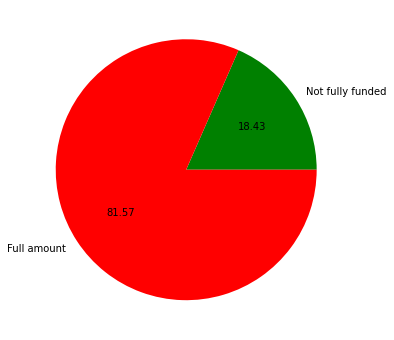

In [66]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.pie(np.c_[np.sum(np.where(y==1,1,0)),np.sum(np.where(y==-1,1,0))][0],
        labels=['Not fully funded','Full amount'],
        colors=['g','r'],
        shadow=False,
        autopct ='%.2f' )
plt.gcf().set_size_inches((6,6))
plt.savefig("pie.png",dpi=300, bbox_inches='tight')

In [62]:
yhat = knn.predict(x)
TP = np.sum(np.logical_and(yhat==-1,y==-1))
TN = np.sum(np.logical_and(yhat==1,y==1))
FP = np.sum(np.logical_and(yhat==-1,y==1))
FN = np.sum(np.logical_and(yhat==1,y==-1))
print('TP: '+ str(TP), ', FP: '+ str(FP))
print('FN: '+ str(FN), ', TN: '+ str(TN))

TP: 3370 , FP: 690
FN: 7 , TN: 73


In [63]:
from sklearn import metrics 
metrics.confusion_matrix(yhat, y)

array([[3370,  690],
       [   7,   73]])

In [64]:
#True positives (TP): 
#When the classifier predicts a sample as positive and it really is positive.
#False positives (FP): 
#When the classifier predicts a sample as positive but in fact it is negative.
#True negatives (TN): 
#When the classifier predicts a sample as negative and it really is negative.
#False negatives (FN): 
#When the classifier predicts a sample as negative but in fact it is positive.

#Train a classifier using .fit()
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
yhat=knn.predict(x)

print("classification accuracy:", metrics.accuracy_score(yhat, y))
print("confusion matrix: \n" + str(metrics.confusion_matrix(yhat, y)))
print("classification report:", metrics.classification_report(yhat, y))


classification accuracy: 1.0
confusion matrix: 
[[3377    0]
 [   0  763]]
classification report:               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      3377
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140



In [44]:
# Simulate a real case: Randomize and split data in two subsets PRC*100% for training and 
# the rest (1-PRC)*100% for testing
import numpy as np
perm = np.random.permutation(y.size)
PRC = 0.7
split_point = int(np.ceil(y.shape[0]*PRC))

X_train = x[perm[:split_point].ravel(),:]
y_train = y[perm[:split_point].ravel()]

X_test = x[perm[split_point:].ravel(),:]
y_test = y[perm[split_point:].ravel()]

print('Training shape: ' + str(X_train.shape), ' , training targets shape: '+str(y_train.shape))
print('Testing shape: ' + str(X_test.shape), ' , testing targets shape: '+str(y_test.shape))

Training shape: (2898, 15)  , training targets shape: (2898,)
Testing shape: (1242, 15)  , testing targets shape: (1242,)


In [45]:
#Train a classifier on training data
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

#Check on the training set and visualize performance
yhat=knn.predict(X_train)

from sklearn import metrics
print("\nTRAINING STATS:")
print("classification accuracy:", metrics.accuracy_score(yhat, y_train))
print("confusion matrix: \n"+ str(metrics.confusion_matrix(y_train, yhat)))


TRAINING STATS:
classification accuracy: 1.0
confusion matrix: 
[[2350    0]
 [   0  548]]


In [48]:
#Check on the test set
yhat=knn.predict(X_test)
print("TESTING STATS:")
print("classification accuracy:", metrics.accuracy_score(yhat, y_test))
print("confusion matrix: \n"+ str(metrics.confusion_matrix(yhat,y_test)))

TESTING STATS:
classification accuracy: 0.748792270531401
confusion matrix: 
[[866 151]
 [161  64]]


In [49]:
#The splitting can be done using the tools provided by sklearn:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

PRC = 0.3
acc = np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat, y_test)
acc.shape=(1,10)
print("Mean expected error: "+str(np.mean(acc[0])))

Mean expected error: 0.7577294685990339


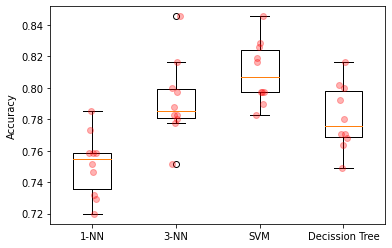

In [52]:
#The splitting can be done using the tools provided by sklearn:
from sklearn import tree
from sklearn import svm

PRC = 0.1
acc_r=np.zeros((10,4))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)


plt.boxplot(acc_r);
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decission Tree'])
plt.ylabel('Accuracy')
plt.savefig("error_ms_1.png",dpi=300, bbox_inches='tight')

Mean accuracy: [0.82536232 0.8263285  0.83188406 0.83405797 0.83502415 0.83236715
 0.82826087 0.82512077 0.82270531 0.81835749 0.8147343  0.80724638
 0.80289855 0.80120773 0.79758454 0.78550725 0.78599034 0.78405797]
Selected model index: 4
Complexity: 6


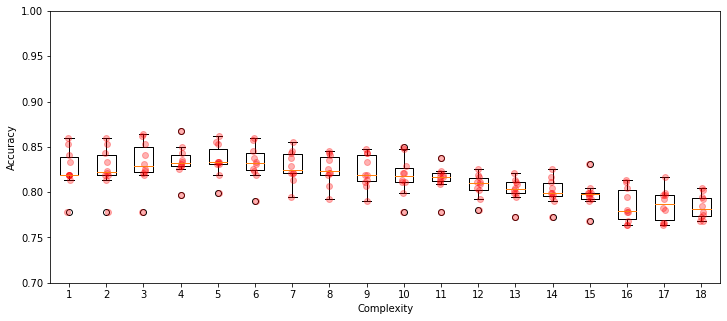

In [54]:
%reset -f
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold
import pickle

ofname = open('dataset_small.pkl.txt','rb') 
(X,y) = pickle.load(ofname, encoding="latin1")

#Create a 10-fold cross validation set
kf = KFold(n_splits=10, shuffle=True, random_state=0)
      
#Search the parameter among the following
C=np.arange(2,20,)

acc = np.zeros((10,18))
i=0
for train_index, val_index in kf.split(y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.savefig("model_selection.png",dpi=300, bbox_inches='tight')

Mean accuracy: [0.8254832  0.83031158 0.83091854 0.83393696 0.83303516 0.83182761
 0.82759892 0.82306901 0.81943909 0.81642704 0.80826903 0.80102282
 0.79649474 0.79558749 0.79437812 0.78502439 0.78080024 0.77898482]
Selected model index: 3
Complexity: 5
Test accuracy: 0.8272946859903382


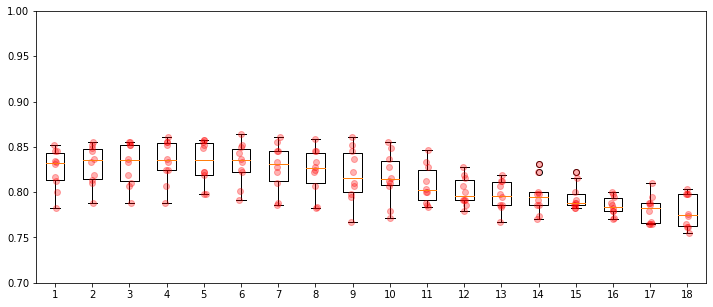

In [55]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import pickle

ofname = open('dataset_small.pkl.txt','rb') 
(X,y) = pickle.load(ofname, encoding='latin1')

#Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Create a 10-fold cross validation set
kf=KFold( n_splits=10, shuffle=True, random_state=0)     
#Search the parameter among the following
C=np.arange(2,20,)
acc = np.zeros((10,18))
i=0
for train_index, val_index in kf.split(X_train):
    X_t, X_val = X_train[train_index], X_train[val_index]
    y_t, y_val = y_train[train_index], y_train[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_t,y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))


#Train the model with the complete training set with the selected complexity
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C[np.argmax(np.mean(acc,axis = 0))])
dt.fit(X_train,y_train)
#Test the model with the test set 
yhat = dt.predict(X_test)
print('Test accuracy: ' + str(metrics.accuracy_score(yhat, y_test)))

#Train the model for handling to the client
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C[np.argmax(np.mean(acc,axis = 0))])
dt.fit(X,y)

plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)


plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)

In [67]:
%reset -f
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import KFold,GridSearchCV
from sklearn import metrics

import pickle
ofname = open('dataset_small.pkl.txt','rb') 
(X,y) = pickle.load(ofname, encoding='latin1')

parameters = {'C':[1e4,1e5,1e6],'gamma':[1e-5,1e-4,1e-3]}

N_folds = 5

kf=KFold( n_splits=N_folds,  shuffle=True, random_state=0)

acc = np.zeros((N_folds,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    clf = svm.SVC(kernel='rbf')
    clf = GridSearchCV(clf, parameters, cv = 3) #This line does a cross-validation on the 
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    
print(metrics.accuracy_score(yhat, y))
print(metrics.confusion_matrix(yhat, y))

0.856280193236715
[[3372  590]
 [   5  173]]
